In [2]:
#py_data_analysis
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rmi_dir = '/VUB/_main_research/mHM/mhm_belgium/RMI/meteo'
eobs_dir = '/VUB/_main_research/mHM/mhm_belgium/EOBS'
era5_dir = '/VUB/_main_research/mHM/mhm_belgium/belgium/meteo_era5/meteo_1950_2023'

In [4]:
vars = ['pre', 'tavg', 'pet']
var = vars[0]
#compare pet
rmi = xr.open_dataset(f'{rmi_dir}/{var}/{var}.nc')
eobs = xr.open_dataset(f'{eobs_dir}/{var}.nc')
era5 = xr.open_dataset(f'{era5_dir}/{var}.nc')

#coordinates
minLat, maxLat, minLon, maxLon = 49.5, 51.0, 4.0, 5.5

#rmi. Ignore nans
rmi = rmi.where(rmi != -9999)
rmi_df = rmi[var].sel(lat=slice(maxLat, minLat), lon=slice(minLon, maxLon)).mean(dim=['lat', 'lon']).to_dataframe()[[var]]
#eobs
eobs_df = eobs[var].sel(lat=slice(minLat, maxLat), lon=slice(minLon, maxLon)).mean(dim=['lat', 'lon']).to_dataframe()[[var]]

#era5
era5_df = era5[var].sel(lat=slice(maxLat, minLat), lon=slice(minLon, maxLon)).mean(dim=['lat', 'lon']).to_dataframe()[[var]]

#resample to monthly
rmi_df_mon = rmi_df.resample('ME').sum()
eobs_df_mon = eobs_df.resample('ME').sum()
era5_df_mon = era5_df.resample('ME').sum()

#combine
df = pd.concat([rmi_df_mon, eobs_df_mon, era5_df_mon], axis=1)
df.columns = ['RMI', 'EOBS', 'ERA5']

df.dropna(inplace=True)

In [5]:
df

,RMI,EOBS,ERA5
time,,,
1994-01-31,109.656811,107.089203,112.763107
1994-02-28,36.878744,37.370407,44.525974
1994-03-31,101.900418,99.668678,81.737747
1994-04-30,69.550027,68.903641,94.647926
1994-05-31,66.031159,68.466995,82.801544
...,...,...,...
2023-08-31,121.906083,119.217361,111.005455
2023-09-30,62.313080,58.829453,75.451820
2023-10-31,103.025183,102.937782,126.330544


In [6]:
#calculate bias from RMI to EOBS and ERA5
df['RMI_EOBS'] = df['RMI'] - df['EOBS']
df['RMI_ERA5'] = df['RMI'] - df['ERA5']

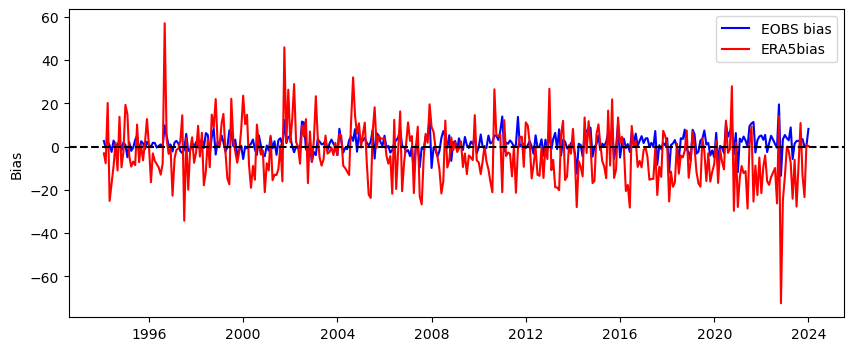

In [7]:
#plot the bias
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(df['RMI_EOBS'], label='EOBS bias', color='blue')
plt.plot(df['RMI_ERA5'], label='ERA5bias', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Bias')
plt.legend()

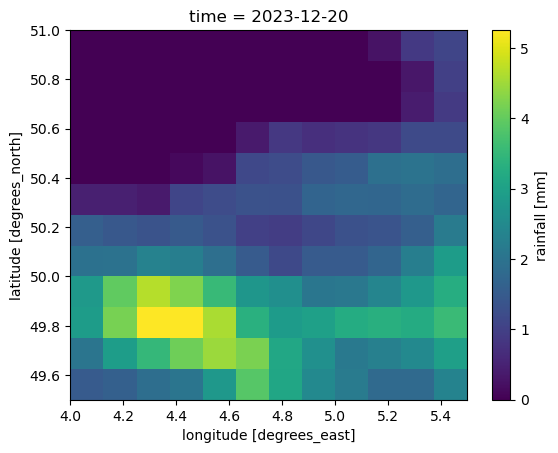

In [8]:
eobs[var].sel(lat=slice(minLat, maxLat), lon=slice(minLon, maxLon)).isel(time=-12).plot()

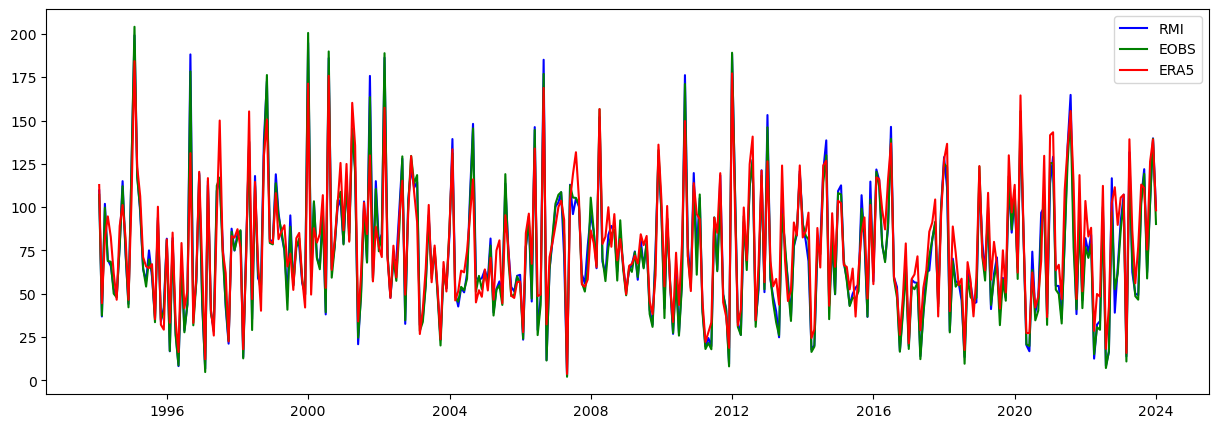

In [9]:
#plot time series
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['RMI'], label='RMI', color='blue')
plt.plot(df.index, df['EOBS'], label='EOBS', color='green')
plt.plot(df.index, df['ERA5'], label='ERA5', color='red')
plt.legend()

Text(0.5, 0, 'RMI')

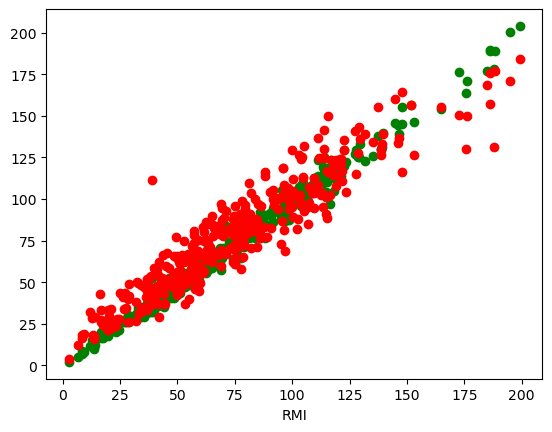

In [10]:
plt.scatter(df['RMI'], df['EOBS'], label='EOBS', color='green')
plt.scatter(df['RMI'], df['ERA5'], label='ERA5', color='red')
plt.xlabel('RMI')